## Description
This code is used to test the performance of additional dataset using VGG16 model

In [1]:
#import used libraries
import os
import numpy as np
import pandas as pd
import dlib
from skimage import io
from PIL import Image
import pathlib
import glob
import cv2
from tqdm import tqdm, tqdm_notebook
from sklearn.model_selection import train_test_split
import ntpath
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Data Preprocessing

### Loading - Ennie

In [2]:
ennie = glob.glob("./Additional_dataset/Ennie/*")

In [3]:
ennie_folderName = [os.path.dirname(i) for i in ennie]
ennie_imageName = [ntpath.split(i)[1] for i in ennie]
ennie_personName = [["Ennie"]*len(ennie)][0]
ennie_label = [1]*len(ennie)

ennie_id = []
ennie_old_id = []
for item in ennie_imageName:
    ennie_id.append('./Additional_dataset_after1/Ennie/' + item)
for item in ennie_imageName:
    ennie_old_id.append('./Additional_dataset/Ennie/' + item)

In [4]:
ennie_df = pd.DataFrame()
ennie_df["Id"] = ennie_id
ennie_df["Old_Id"] = ennie_old_id
ennie_df["Folder_Name"] = ennie_folderName
ennie_df["Image_Name"] = ennie_imageName
ennie_df["Person_Name"] = ennie_personName
ennie_df["Labels"] = ennie_label
ennie_df.head()

,Id,Old_Id,Folder_Name,Image_Name,Person_Name,Labels
0,./Additional_dataset_after1/Ennie/Ennie1.JPG,./Additional_dataset/Ennie/Ennie1.JPG,./Additional_dataset/Ennie,Ennie1.JPG,Ennie,1
1,./Additional_dataset_after1/Ennie/Ennie3.JPG,./Additional_dataset/Ennie/Ennie3.JPG,./Additional_dataset/Ennie,Ennie3.JPG,Ennie,1
2,./Additional_dataset_after1/Ennie/Ennie2.JPG,./Additional_dataset/Ennie/Ennie2.JPG,./Additional_dataset/Ennie,Ennie2.JPG,Ennie,1


### Loading - Jimmy

In [5]:
jimmy = glob.glob("./Additional_dataset/Jimmy/*")

In [6]:
jimmy_folderName = [os.path.dirname(i) for i in jimmy]
jimmy_imageName = [ntpath.split(i)[1] for i in jimmy]
jimmy_personName = [["Jimmy"]*len(jimmy)][0]
jimmy_label = [2]*len(jimmy)

jimmy_id = []
jimmy_old_id = []
for item in jimmy_imageName:
    jimmy_id.append('./Additional_dataset_after1/Jimmy/' + item)
for item in jimmy_imageName:
    jimmy_old_id.append('./Additional_dataset/Jimmy/' + item)

In [7]:
jimmy_df = pd.DataFrame()
jimmy_df["Id"] = jimmy_id
jimmy_df["Old_Id"] = jimmy_old_id
jimmy_df["Folder_Name"] = jimmy_folderName
jimmy_df["Image_Name"] = jimmy_imageName
jimmy_df["Person_Name"] = jimmy_personName
jimmy_df["Labels"] = jimmy_label
jimmy_df.head()

,Id,Old_Id,Folder_Name,Image_Name,Person_Name,Labels
0,./Additional_dataset_after1/Jimmy/Jimmy3.jpg,./Additional_dataset/Jimmy/Jimmy3.jpg,./Additional_dataset/Jimmy,Jimmy3.jpg,Jimmy,2
1,./Additional_dataset_after1/Jimmy/Jimmy2.jpg,./Additional_dataset/Jimmy/Jimmy2.jpg,./Additional_dataset/Jimmy,Jimmy2.jpg,Jimmy,2
2,./Additional_dataset_after1/Jimmy/Jimmy1.jpg,./Additional_dataset/Jimmy/Jimmy1.jpg,./Additional_dataset/Jimmy,Jimmy1.jpg,Jimmy,2


### Loading - Biden

In [8]:
biden = glob.glob("./Additional_dataset/Biden/*")

In [9]:
biden_folderName = [os.path.dirname(i) for i in biden]
biden_imageName = [ntpath.split(i)[1] for i in biden]
biden_personName = [["Biden"]*len(biden)][0]
biden_label = [3]*len(biden)

biden_id = []
biden_old_id = []
for item in biden_imageName:
    biden_id.append('./Additional_dataset_after1/Biden/' + item)
for item in biden_imageName:
    biden_old_id.append('./Additional_dataset/Biden/' + item)

In [10]:
biden_df = pd.DataFrame()
biden_df["Id"] = biden_id
biden_df["Old_Id"] = biden_old_id
biden_df["Folder_Name"] = biden_folderName
biden_df["Image_Name"] = biden_imageName
biden_df["Person_Name"] = biden_personName
biden_df["Labels"] = biden_label
biden_df.head(10)

,Id,Old_Id,Folder_Name,Image_Name,Person_Name,Labels
0,./Additional_dataset_after1/Biden/Biden3.jpeg,./Additional_dataset/Biden/Biden3.jpeg,./Additional_dataset/Biden,Biden3.jpeg,Biden,3
1,./Additional_dataset_after1/Biden/Biden2.jpeg,./Additional_dataset/Biden/Biden2.jpeg,./Additional_dataset/Biden,Biden2.jpeg,Biden,3
2,./Additional_dataset_after1/Biden/Biden1.jpeg,./Additional_dataset/Biden/Biden1.jpeg,./Additional_dataset/Biden,Biden1.jpeg,Biden,3


### Loading - Elizabeth II

In [11]:
elizabeth = glob.glob("./Additional_dataset/Elizabeth II/*")

In [12]:
elizabeth_folderName = [os.path.dirname(i) for i in elizabeth]
elizabeth_imageName = [ntpath.split(i)[1] for i in elizabeth]
elizabeth_personName = [["Elizabeth II"]*len(elizabeth)][0]
elizabeth_label = [4]*len(elizabeth)

elizabeth_id = []
elizabeth_old_id = []
for item in elizabeth_imageName:
    elizabeth_id.append('./Additional_dataset_after1/Elizabeth II/' + item)
for item in elizabeth_imageName:
    elizabeth_old_id.append('./Additional_dataset/Elizabeth II/' + item)

In [13]:
elizabeth_df = pd.DataFrame()
elizabeth_df["Id"] = elizabeth_id
elizabeth_df["Old_Id"] = elizabeth_old_id
elizabeth_df["Folder_Name"] = elizabeth_folderName
elizabeth_df["Image_Name"] = elizabeth_imageName
elizabeth_df["Person_Name"] = elizabeth_personName
elizabeth_df["Labels"] = elizabeth_label
elizabeth_df.head()

,Id,Old_Id,Folder_Name,Image_Name,Person_Name,Labels
0,./Additional_dataset_after1/Elizabeth II/Eliza...,./Additional_dataset/Elizabeth II/Elizabeth2.jpeg,./Additional_dataset/Elizabeth II,Elizabeth2.jpeg,Elizabeth II,4
1,./Additional_dataset_after1/Elizabeth II/Eliza...,./Additional_dataset/Elizabeth II/Elizabeth3.jpeg,./Additional_dataset/Elizabeth II,Elizabeth3.jpeg,Elizabeth II,4
2,./Additional_dataset_after1/Elizabeth II/Eliza...,./Additional_dataset/Elizabeth II/Elizabeth1.jpg,./Additional_dataset/Elizabeth II,Elizabeth1.jpg,Elizabeth II,4


### Loading - Teresa

In [14]:
teresa = glob.glob("./Additional_dataset/Teresa/*")

In [15]:
teresa_folderName = [os.path.dirname(i) for i in teresa]
teresa_imageName = [ntpath.split(i)[1] for i in teresa]
teresa_personName = [["Teresa"]*len(teresa)][0]
teresa_label = [5]*len(teresa)

teresa_id = []
teresa_old_id = []
for item in teresa_imageName:
    teresa_id.append('./Additional_dataset_after1/Teresa/' + item)
for item in teresa_imageName:
    teresa_old_id.append('./Additional_dataset/Teresa/' + item)

In [16]:
teresa_df = pd.DataFrame()
teresa_df["Id"] = teresa_id
teresa_df["Old_Id"] = teresa_old_id
teresa_df["Folder_Name"] = teresa_folderName
teresa_df["Image_Name"] = teresa_imageName
teresa_df["Person_Name"] = teresa_personName
teresa_df["Labels"] = teresa_label
teresa_df.head()

,Id,Old_Id,Folder_Name,Image_Name,Person_Name,Labels
0,./Additional_dataset_after1/Teresa/Teresa1.JPG,./Additional_dataset/Teresa/Teresa1.JPG,./Additional_dataset/Teresa,Teresa1.JPG,Teresa,5
1,./Additional_dataset_after1/Teresa/Teresa2.JPG,./Additional_dataset/Teresa/Teresa2.JPG,./Additional_dataset/Teresa,Teresa2.JPG,Teresa,5
2,./Additional_dataset_after1/Teresa/Teresa3.png,./Additional_dataset/Teresa/Teresa3.png,./Additional_dataset/Teresa,Teresa3.png,Teresa,5


### Combine all dataframes

In [17]:
frames = [ennie_df, jimmy_df, biden_df, elizabeth_df, teresa_df]
add_people_df = pd.concat(frames)
add_people_df.shape

(15, 6)

In [18]:
add_people_df.reset_index(inplace = True, drop = True)
print(add_people_df.head(), '\n')
print(add_people_df.tail())

                                             Id  \
0  ./Additional_dataset_after1/Ennie/Ennie1.JPG   
1  ./Additional_dataset_after1/Ennie/Ennie3.JPG   
2  ./Additional_dataset_after1/Ennie/Ennie2.JPG   
3  ./Additional_dataset_after1/Jimmy/Jimmy3.jpg   
4  ./Additional_dataset_after1/Jimmy/Jimmy2.jpg   

                                  Old_Id                 Folder_Name  \
0  ./Additional_dataset/Ennie/Ennie1.JPG  ./Additional_dataset/Ennie   
1  ./Additional_dataset/Ennie/Ennie3.JPG  ./Additional_dataset/Ennie   
2  ./Additional_dataset/Ennie/Ennie2.JPG  ./Additional_dataset/Ennie   
3  ./Additional_dataset/Jimmy/Jimmy3.jpg  ./Additional_dataset/Jimmy   
4  ./Additional_dataset/Jimmy/Jimmy2.jpg  ./Additional_dataset/Jimmy   

   Image_Name Person_Name  Labels  
0  Ennie1.JPG       Ennie       1  
1  Ennie3.JPG       Ennie       1  
2  Ennie2.JPG       Ennie       1  
3  Jimmy3.jpg       Jimmy       2  
4  Jimmy2.jpg       Jimmy       2   

                                          

### Cropping and Resizing images

In [19]:
def facecrop(df):
    """crop and keep only the face part in images"""
    # face images file
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # crop the image to face size
    for i, temp_df in df.iterrows():
        img = cv2.imread(temp_df["Old_Id"])
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)
        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (255,255,255))
            sub_face = img[y:y+h, x:x+w]
            
            fname, ext = os.path.splitext(temp_df["Id"])
            cv2.imwrite(temp_df["Id"], sub_face)
    return

In [20]:
facecrop(add_people_df)

### Converting images to grayscale

In [21]:
def convert_to_grayscale(df):
    """convert images from colorful to grayscale"""
    for i, temp_df in df.iterrows():
        img = cv2.imread(temp_df["Id"])
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        face_resized = cv2.resize(gray, (224,224))
        cv2.imwrite(temp_df["Id"], face_resized)

In [22]:
convert_to_grayscale(add_people_df)

### Splitting dataset to X, Y

In [23]:
X = []
Y = []

for img_id in tqdm_notebook(add_people_df['Id'].values):
    temp = cv2.imread(img_id)
    temp = temp.astype('float32')
    temp = np.expand_dims(temp, axis=2)
    X.append(temp)
    Y.append(add_people_df[add_people_df['Id'] == img_id]['Labels'].values[0]) 

#normalize
X = np.asarray(X)
X = X.astype('float32')
X /= 255
Y = [[el] for el in Y]
Y = np.asarray(Y)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [24]:
# squeeze the dimensions
X = np.squeeze(X, 3)

In [25]:
# convert labels to dummy variables
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)

Y = enc.transform(Y).toarray()

In [26]:
X.shape

(15, 224, 224, 3)

In [27]:
Y.shape

(15, 5)

## Testing on additional dataset

Adagrad

In [29]:
best_model1 = load_model('face_detect_VGG16_RMSProp.h5')

In [30]:
# Score trained model.
best_model1.evaluate(X, Y)

1/1 [==============================] - 4s 4s/step - loss: 1.1217 - accuracy: 0.6000


[1.1217491626739502, 0.6000000238418579]

In [31]:
# make predictions.
pred1 = best_model1.predict(X)

RMSProp

In [34]:
best_model2 = load_model('face_detect_VGG16_Adagrad.h5')

In [35]:
# Score trained model.
best_model2.evaluate(X, Y)

1/1 [==============================] - 4s 4s/step - loss: 0.9872 - accuracy: 0.7333


[0.9871532320976257, 0.7333333492279053]

In [36]:
# make predictions.
pred2 = best_model2.predict(X)

## Confustion matrix

In [49]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    # Show all ticks
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # Label ticks with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

Adagrad

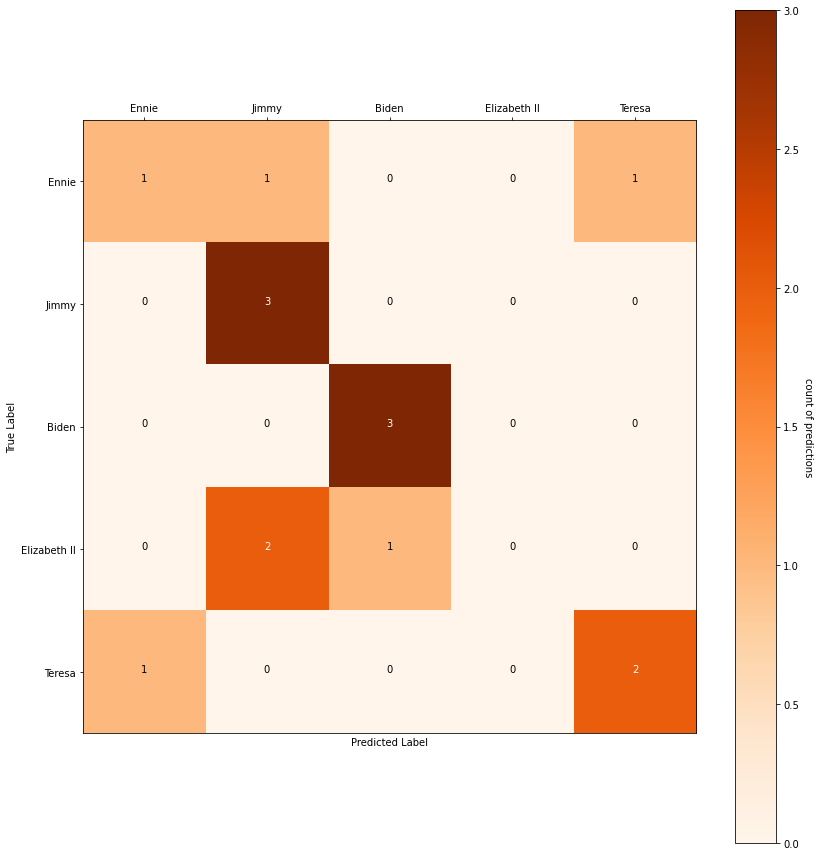

In [50]:
labels = ['Ennie','Jimmy','Biden','Elizabeth II','Teresa']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred1, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred1[errors]
Y_true_errors = Y_true[errors]
X_valid_errors = X[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax, cmap=plt.cm.Oranges, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

RMSProp

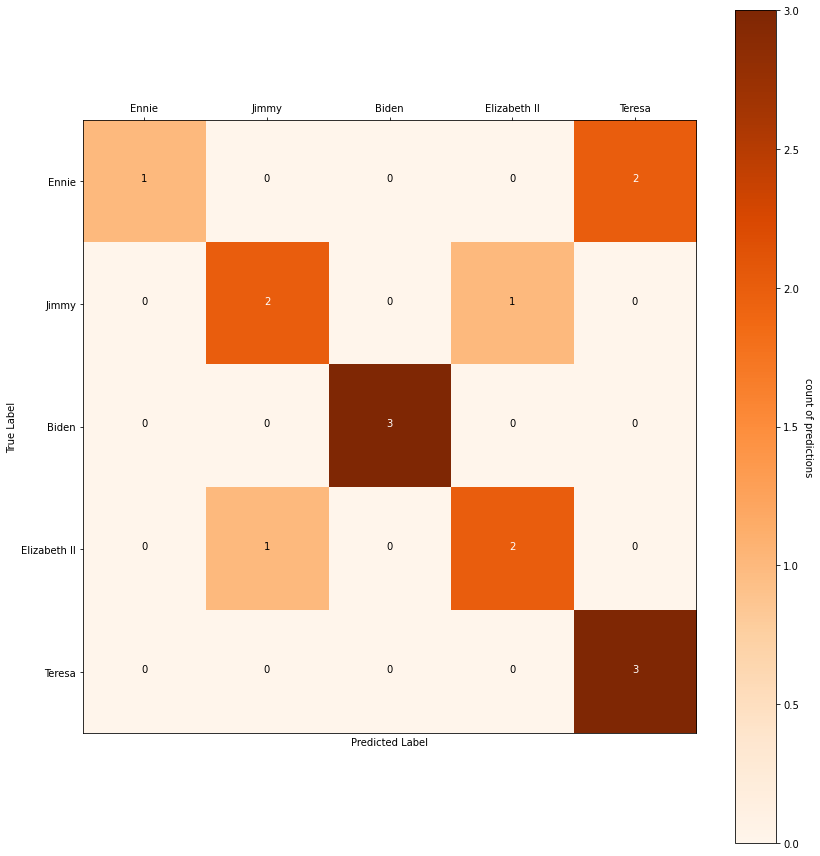

In [51]:
labels = ['Ennie','Jimmy','Biden','Elizabeth II','Teresa']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred2, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred2[errors]
Y_true_errors = Y_true[errors]
X_valid_errors = X[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax, cmap=plt.cm.Oranges, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()